### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

### Sales & Expense EDA

In [2]:
sales_df = pd.read_csv("/kaggle/input/retail-data/fact_sales_expense.csv", index_col="date", parse_dates=True)

In [3]:
sales_df.head()

,cash,gpay,purchase,other,total_sales,total_expense
date,,,,,,
2023-01-01,4300,1800,0,1200,6100,1200
2023-01-02,3200,2300,5500,0,5500,5500
2023-01-03,4400,2200,3000,3200,6600,6200
2023-01-04,2500,2800,0,800,5300,800
2023-01-05,1000,2200,6300,1000,3200,7300


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   cash           365 non-null    int64
 1   gpay           365 non-null    int64
 2   purchase       365 non-null    int64
 3   other          365 non-null    int64
 4   total_sales    365 non-null    int64
 5   total_expense  365 non-null    int64
dtypes: int64(6)
memory usage: 20.0 KB


In [5]:
sales_df.describe()

,cash,gpay,purchase,other,total_sales,total_expense
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2972.876712,2021.917808,2338.356164,909.452055,4994.794521,3247.808219
std,1196.057488,576.996433,3053.669659,1601.655986,1331.198037,3381.453231
min,1000.000000,1000.000000,0.000000,0.000000,2300.000000,0.000000
25%,1900.000000,1500.000000,0.000000,0.000000,4000.000000,0.000000
50%,3000.000000,2000.000000,0.000000,0.000000,5000.000000,2400.000000
75%,4100.000000,2500.000000,4700.000000,1300.000000,6100.000000,5500.000000
max,5000.000000,3000.000000,16000.000000,8000.000000,7900.000000,20000.000000


In [6]:
col_name = sales_df.columns.to_series()[np.isinf(sales_df).any()] 
print(col_name) 

Series([], dtype: object)


Text(0.5, 0, 'Sales')

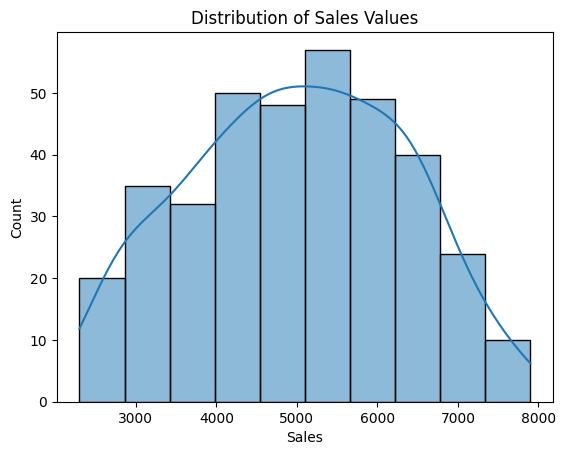

In [7]:
sns.histplot(x="total_sales", kde=True, data=sales_df)
plt.title("Distribution of Sales Values")
plt.xlabel("Sales")

Text(0.5, 1.0, 'Daily Sales for the year 2023')

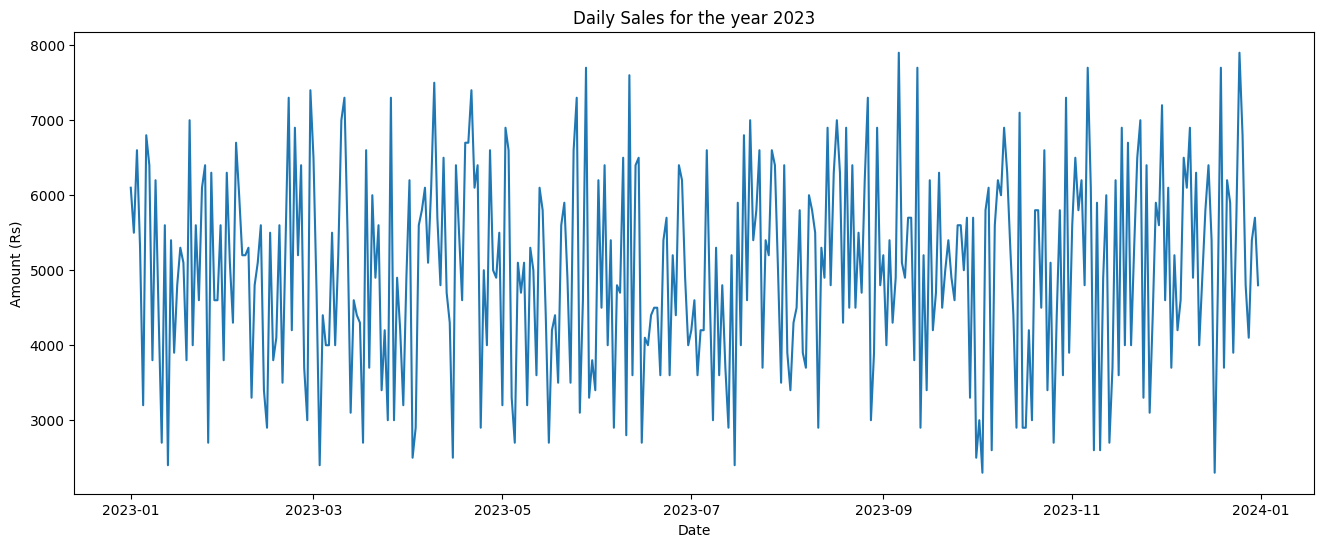

In [8]:
plt.figure(figsize=(16,6))
sns.lineplot(x=sales_df.index, y="total_sales", data=sales_df)


plt.xlabel("Date")
plt.ylabel("Amount (Rs)")
plt.title("Daily Sales for the year 2023")

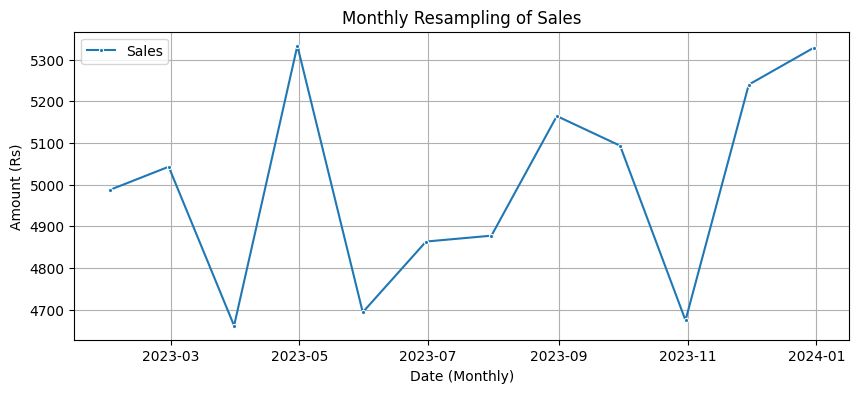

In [9]:
# Resampling to monthly frequency, using mean as aggregate function
monthly_sales = sales_df.resample('ME').mean()

plt.figure(figsize=(10, 4))
sns.lineplot(x=monthly_sales.index, y=monthly_sales['total_sales'], label='Sales', marker='.')


plt.xlabel("Date (Monthly)")
plt.ylabel("Amount (Rs)")
plt.title("Monthly Resampling of Sales")
plt.grid(True)

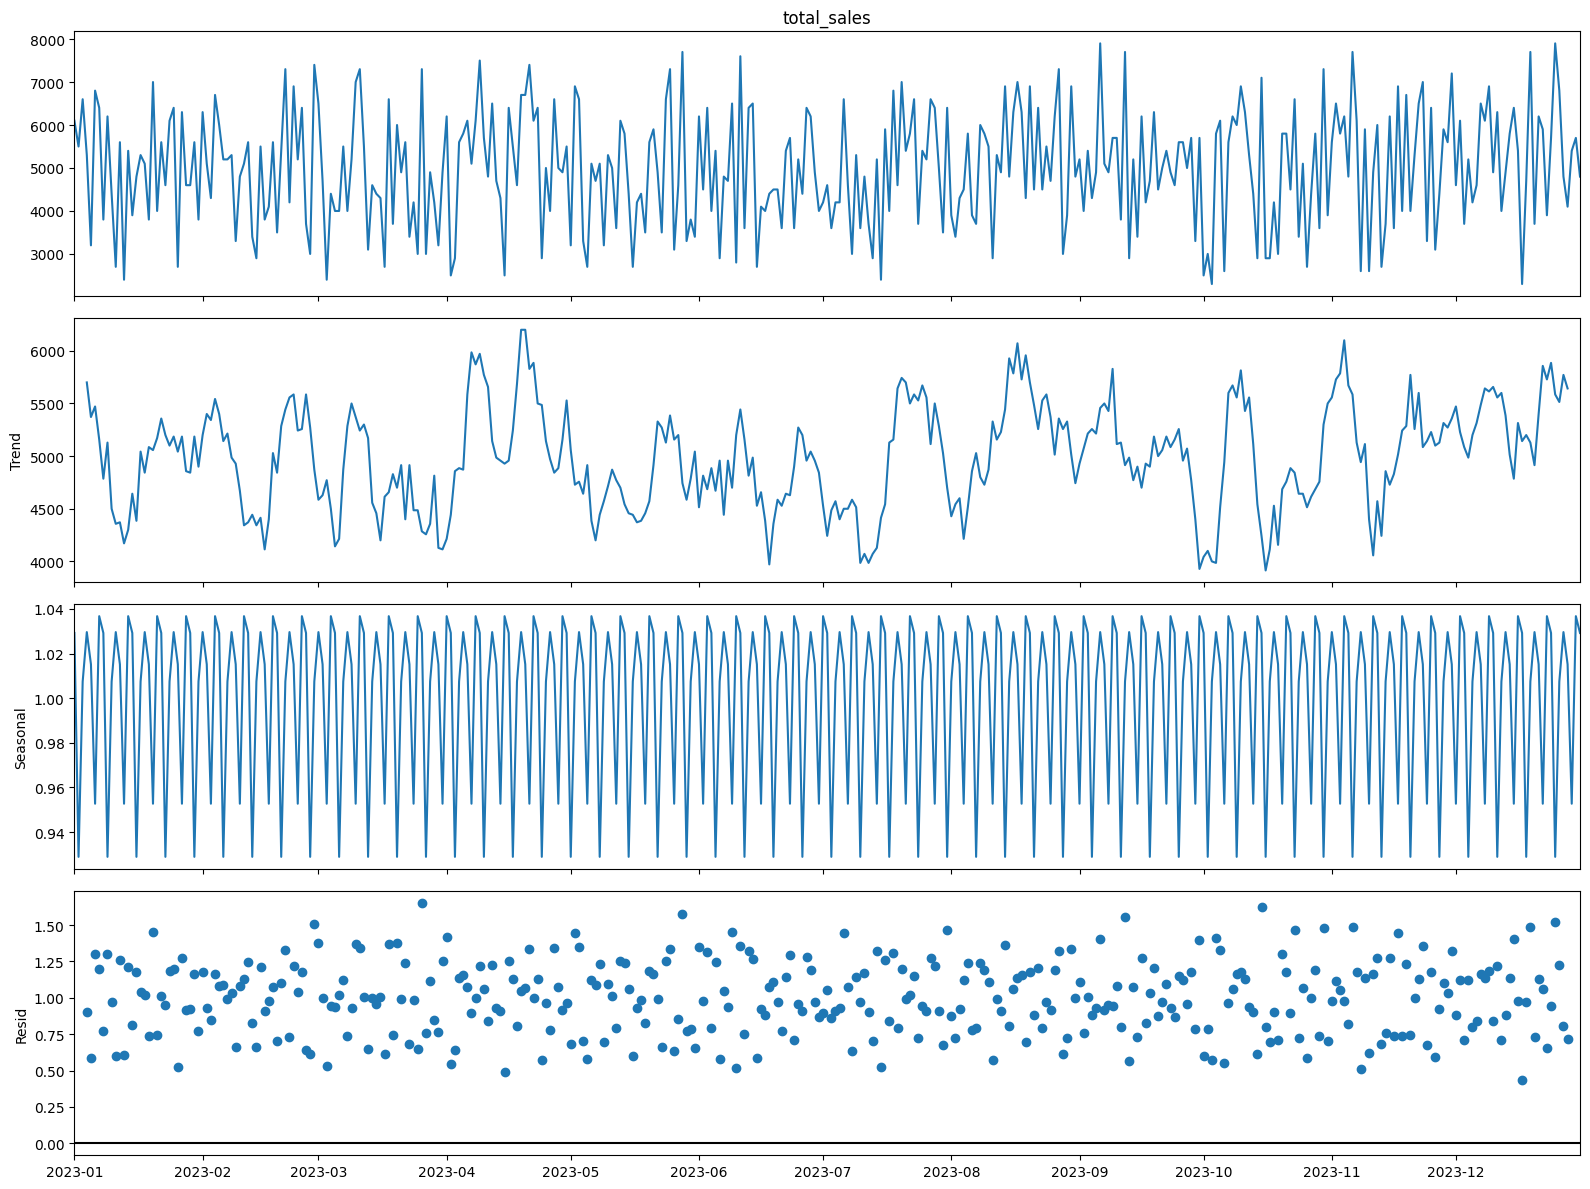

In [10]:
decomposition = sm.tsa.seasonal_decompose(sales_df['total_sales'], model='multiplicative')

plt.rcParams.update({'figure.figsize': (16,12)})
fig = decomposition.plot()
plt.show()

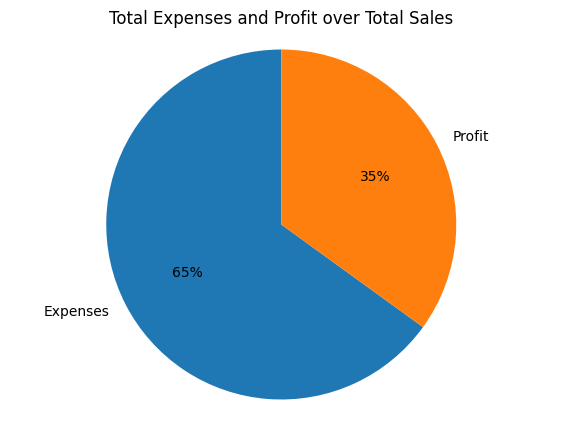

In [11]:
# Calculate total sales, total expenses, and total profit
total_sales = sum(sales_df['total_sales'])
total_expenses = sum(sales_df['total_expense'])
total_profit = total_sales - total_expenses

# Create labels and values for the pie chart
labels = ['Expenses', 'Profit']
sizes = [total_expenses, total_profit]

# Plotting the pie chart
plt.figure(figsize=(7, 5))
plt.pie(sizes, labels=labels, autopct='%.0f%%', startangle=90)
plt.title('Total Expenses and Profit over Total Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


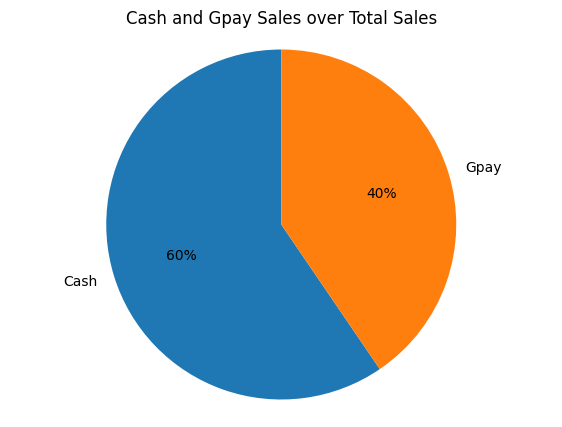

In [12]:
cash_sales = sum(sales_df['cash'])
gpay_sales = sum(sales_df['gpay'])

# Create labels and values for the pie chart
labels = ['Cash', 'Gpay']
sizes = [cash_sales, gpay_sales]

# Plotting the pie chart
plt.figure(figsize=(7, 5))
plt.pie(sizes, labels=labels, autopct='%.0f%%', startangle=90)
plt.title('Cash and Gpay Sales over Total Sales')
plt.axis('equal')
plt.show()

### Credit EDA

In [13]:
credit_df = pd.read_csv("/kaggle/input/retail-data/fact_credit.csv")

In [14]:
credit_df.head()

,date,supplier,transaction_type,amount
0,2023-01-04,Pinky Gifts,Purchase,15000
1,2023-01-05,Vishnu Stationeries,Purchase,15000
2,2023-01-06,Pinky Gifts,Payment,-2000
3,2023-01-08,Vishnu Stationeries,Payment,-2800
4,2023-01-09,Mahadev Stationeries,Purchase,10000


In [15]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              300 non-null    object
 1   supplier          300 non-null    object
 2   transaction_type  300 non-null    object
 3   amount            300 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.5+ KB


In [16]:
credit_df.describe()

,amount
count,300.000000
mean,209.000000
std,4439.916877
min,-6900.000000
25%,-3225.000000
50%,-750.000000
75%,3700.000000
max,15000.000000


In [17]:
# Calculate transaction volume(no of payments and purchases) and credit balance per supplier
supplier_analysis = credit_df.groupby('supplier').agg(
    transaction_volume=('transaction_type', 'count'),
    credit_balance=('amount', 'sum')
).reset_index()

In [18]:
supplier_analysis

,supplier,transaction_volume,credit_balance
0,Bafna Gifts,77,7900
1,Mahadev Stationeries,69,25400
2,Pinky Gifts,74,14200
3,Vishnu Stationeries,80,15200


Text(0.5, 1.0, 'Total Credit Balance by Supplier')

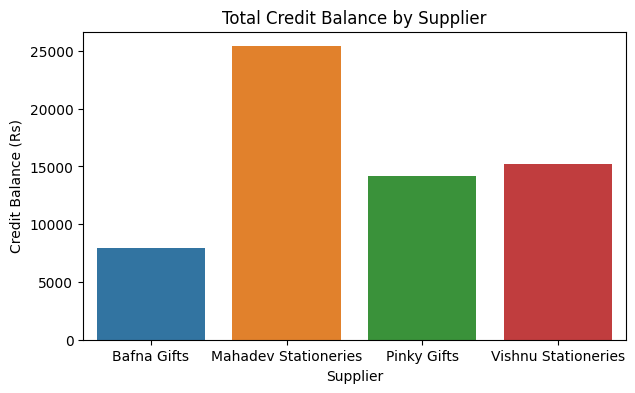

In [19]:
plt.figure(figsize=(7,4))
sns.barplot(x='supplier', y='credit_balance', data=supplier_analysis)

plt.xlabel('Supplier')
plt.ylabel('Credit Balance (Rs)')
plt.title('Total Credit Balance by Supplier')

In [20]:
# Calculate transaction volume(no of payments and purchases) and credit balance per supplier
transaction = credit_df.groupby(['supplier','transaction_type']).agg(
    transaction_volume=('transaction_type', 'count')
).reset_index()

Text(0.5, 1.0, 'Purchase and Payment, by Suppliers')

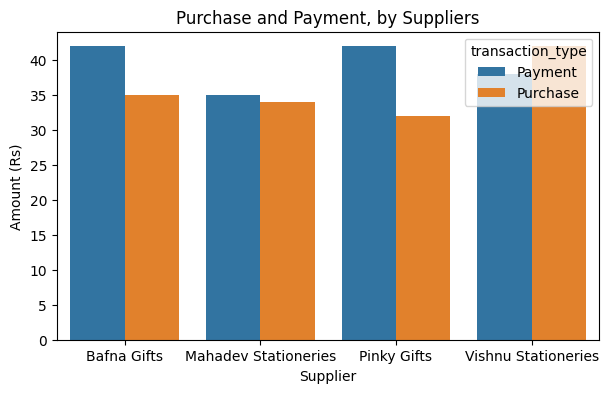

In [21]:
plt.figure(figsize=(7,4))
sns.barplot(x='supplier', y='transaction_volume', hue='transaction_type', data=transaction)

plt.xlabel('Supplier')
plt.ylabel('Amount (Rs)')
plt.title('Purchase and Payment, by Suppliers')

### Demand EDA

In [22]:
demand_df = pd.read_csv("/kaggle/input/retail-data/fact_demand.csv")

# Convert date column to datetime
demand_df['date'] = pd.to_datetime(demand_df['date'])

In [23]:
demand_df.head()

,date,demand
0,2023-01-01,Color Pencil
1,2023-01-01,Crayons
2,2023-01-02,Chalk
3,2023-01-03,Eraser
4,2023-01-06,Fountain Pen


In [24]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    300 non-null    datetime64[ns]
 1   demand  300 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 4.8+ KB


In [25]:
# Group by product, client, and date and sum up demand
product_demand = demand_df.groupby('demand')['date'].size().reset_index(name='demand_count')

In [26]:
top_demand_products = product_demand.sort_values(by='demand_count', ascending=False).head(5)

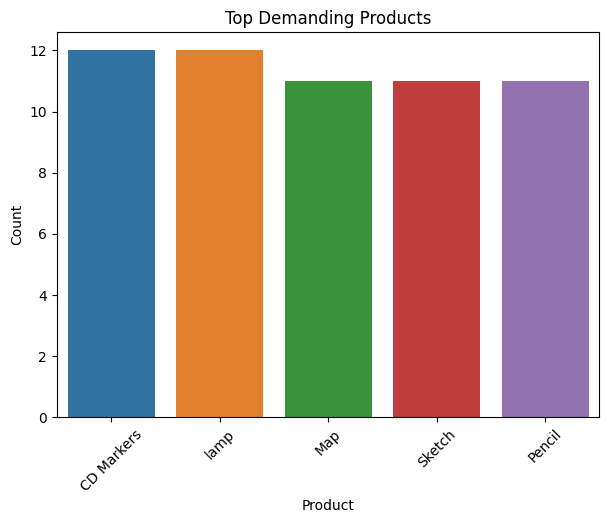

In [27]:
plt.figure(figsize=(7,5))
sns.barplot(x="demand",y="demand_count",data=top_demand_products)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top Demanding Products')
plt.xticks(rotation=45)
plt.show()

In [28]:
dim_product_df =pd.read_csv("/kaggle/input/retail-data/dim_product.csv")

In [29]:
demand_with_category = pd.merge(product_demand, dim_product_df, left_on='demand', right_on='product_name', how='left')

In [30]:
top_demand_products_by_category = demand_with_category.sort_values(by='demand_count', ascending=False).head(5)

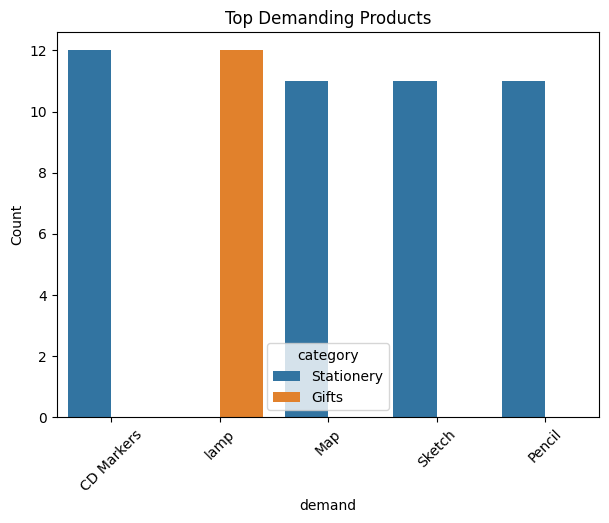

In [31]:
plt.figure(figsize=(7,5))
sns.barplot(x="demand",y="demand_count", hue='category',data=top_demand_products_by_category)
plt.ylabel('Count')
plt.title('Top Demanding Products')
plt.xticks(rotation=45)
plt.show()

In [34]:
demand_with_category

,demand,demand_count,product_id,product_name,category
0,Accounts note,2,20,Accounts note,Stationery
1,Brown cover,8,26,Brown cover,Stationery
2,CD Markers,12,4,CD Markers,Stationery
3,Carbon sheet,5,19,Carbon sheet,Stationery
4,Chalk,8,9,Chalk,Stationery
5,Chart,4,27,Chart,Stationery
6,Color Pencil,8,6,Color Pencil,Stationery
7,Compass,6,22,Compass,Stationery
8,Crayons,10,7,Crayons,Stationery
9,Diary,4,14,Diary,Stationery


In [35]:
demand_with_category = demand_with_category.groupby('category').agg(
    category_count=('demand_count', 'sum')
).reset_index()

In [36]:
demand_with_category

,category,category_count
0,Gifts,92
1,Stationery,208


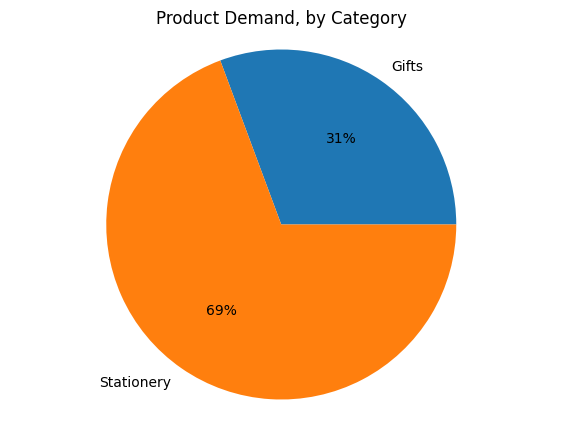

In [41]:
lables = labels=demand_with_category['category']
sizes = demand_with_category['category_count']

# Plotting the pie chart
plt.figure(figsize=(7, 5))
plt.pie(sizes,labels=labels, autopct='%.0f%%')
plt.title('Product Demand, by Category')
plt.axis('equal')
plt.show()

### Cilent Sales EDA

In [42]:
client_sales_df = pd.read_csv("/kaggle/input/retail-data/fact_majorclient_sales.csv")

In [43]:
client_sales_df.head()

,date,client_name,item,amount
0,2023-01-01,Craftsman,Diary,720
1,2023-01-03,RK Industries,Frame,300
2,2023-01-04,Craftsman,lamp,700
3,2023-01-04,Akshaya Constructions,Chalk,120
4,2023-01-08,Bharat Benz,Sharpener,840


In [44]:
client_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         300 non-null    object
 1   client_name  300 non-null    object
 2   item         300 non-null    object
 3   amount       300 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.5+ KB


In [45]:
client_sales_df.describe()

,amount
count,300.000000
mean,814.000000
std,394.042593
min,100.000000
25%,487.500000
50%,810.000000
75%,1130.000000
max,1500.000000


In [47]:
# Aggregate sales data by client
sales_by_client = client_sales_df.groupby('client_name')['amount'].agg(['sum', 'count']).reset_index()

# Calculate average sales per client
sales_by_client['average'] = sales_by_client['sum'] / sales_by_client['count']

In [49]:
sales_by_client

,client_name,sum,count,average
0,Adwaith,55760,64,871.250000
1,Akshaya Constructions,50850,60,847.500000
2,Bharat Benz,51580,68,758.529412
3,Craftsman,44840,58,773.103448
4,RK Industries,41170,50,823.400000


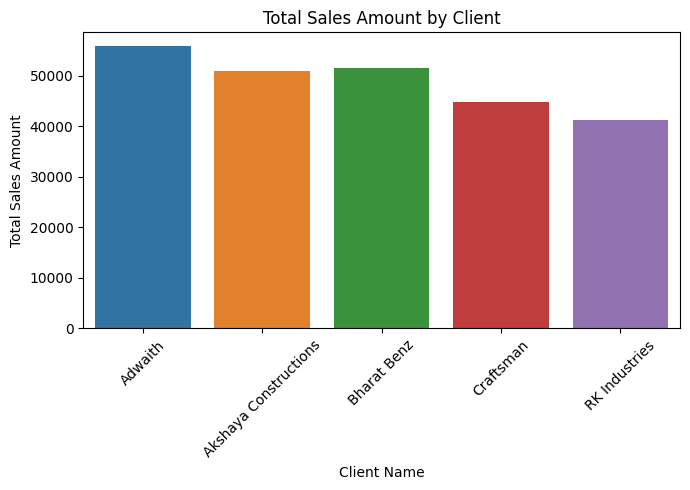

In [52]:
# Visualize the distribution of sales among different clients using a bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=sales_by_client['client_name'], y=sales_by_client['sum'])

plt.xlabel('Client Name')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Client')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Aggregate sales data by product
sales_by_product = client_sales_df.groupby('item')['amount'].agg(['sum', 'count']).reset_index()

# Calculate total and average sales per product
sales_by_product['average'] = sales_by_product['sum'] / sales_by_product['count']

In [54]:
sales_by_product

,item,sum,count,average
0,Accounts note,2030,2,1015.000000
1,Brown cover,9860,11,896.363636
2,CD Markers,2260,2,1130.000000
3,Carbon sheet,7490,10,749.000000
4,Chalk,4450,8,556.250000
5,Chart,4750,5,950.000000
6,Color Pencil,2770,4,692.500000
7,Compass,6530,8,816.250000
8,Crayons,2200,3,733.333333
9,Diary,6960,9,773.333333


In [57]:
# Join fact_majorclient_sales_df with dim_product_df on the item column
sales_with_category = pd.merge(client_sales_df, dim_product_df, left_on='item', right_on='product_name', how='left')

# Visualize top-selling products
top_selling_products = sales_by_product.sort_values(by='sum', ascending=False).head(5)

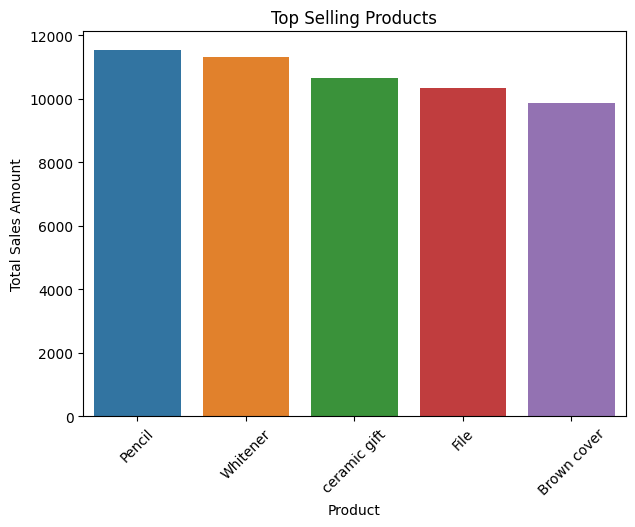

In [58]:
plt.figure(figsize=(7, 5))
sns.barplot(x=top_selling_products['item'], y=top_selling_products['sum'])

plt.xlabel('Product')
plt.ylabel('Total Sales Amount')
plt.title('Top Selling Products')
plt.xticks(rotation=45)
plt.show()

In [60]:
dim_date_df = pd.read_csv("/kaggle/input/retail-data/dim_date.csv")

# Convert date columns to datetime
client_sales_df['date'] = pd.to_datetime(client_sales_df['date'])
dim_date_df['date'] = pd.to_datetime(dim_date_df['date'])

In [62]:
# Join fact_majorclient_sales_df with dim_date_df on the date column
sales_with_date = pd.merge(client_sales_df, dim_date_df, on='date', how='left')

# Group by product and date to aggregate sales data over time for each product
sales_by_product_date = sales_with_date.groupby(['item', 'date']).agg({'amount': 'sum'}).reset_index()

# Get the top-selling products
top_selling_products_by_date = sales_by_product_date.groupby('item')['amount'].sum().nlargest(3).index.tolist()

# Filter data for top-selling products
top_selling_products_data = sales_by_product_date[sales_by_product_date['item'].isin(top_selling_products_by_date)]

In [63]:
sales_by_product_date

,item,date,amount
0,Accounts note,2023-05-16,1390
1,Accounts note,2023-08-30,640
2,Brown cover,2023-01-18,1270
3,Brown cover,2023-01-19,340
4,Brown cover,2023-02-01,1410
...,...,...,...
293,two side frame,2023-01-20,1390
294,two side frame,2023-01-27,1010
295,two side frame,2023-02-22,840
296,two side frame,2023-05-09,310


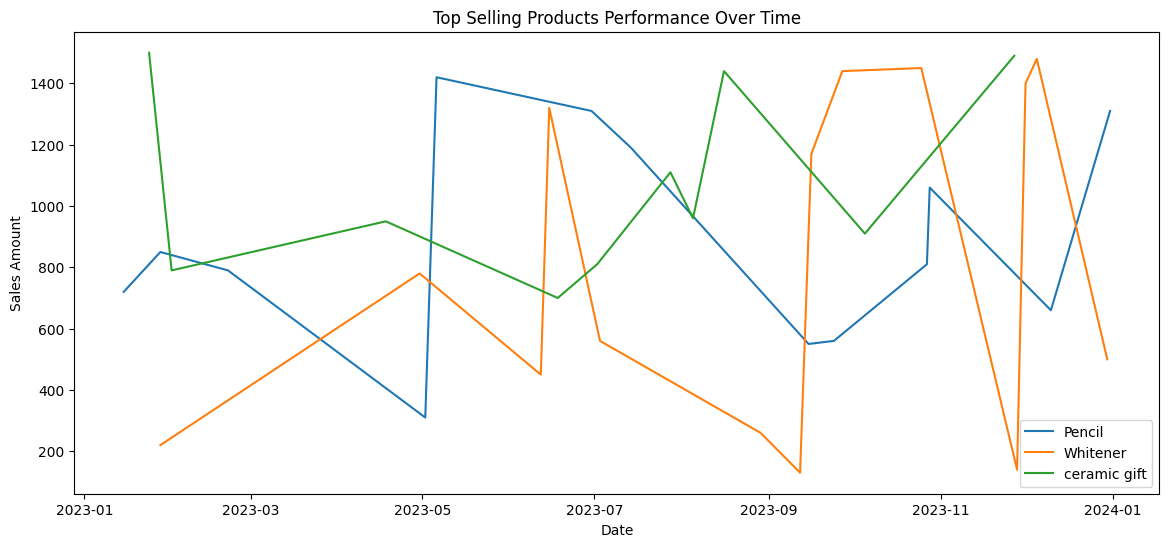

In [69]:
# Create line plots showing the sales trend over time for each top-selling product
plt.figure(figsize=(14, 6))
for product in top_selling_products_data['item'].unique():
    product_data = top_selling_products_data[top_selling_products_data['item'] == product]
    plt.plot(product_data['date'], product_data['amount'], label=product)

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Top Selling Products Performance Over Time')
plt.legend()
plt.show()